
# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The TMDB Movie Dataset has the following attributies.

Rows   : 10806
Columns: 21

Column Names
                  id: Identification Number
             imdb_id: IMDb Identification Number
          popularity: Popularity in number/ ratings
              budget: Gross Budget
             revenue: Gross Revenue
      original_title: Title of the Movie
                cast: Cast
            homepage: Movie website homepage
            director: The person who directed the movie
             tagline:
            keywords:
            overview: Overview of the movie
             runtime: How long the movie last
              genres: What genres the movie belong to
production_companies: What are the companies produced the movie
        release_date: The date the movie was released
          vote_count: How many people voted for the movie
        vote_average: The average vote rate our of 10
        release_year: Released Year
          budget_adj: Movie Budget including 2010 inflnation
        revenue_adj': Movie Revenue including 2010 inflnation

This dataset contains information about 10000 movies collected from the Movie Database, including user ratings and revenue.


In this presentation, based on this dataset various questions will be answered for the curious minds. For example who are the most famous actors based on number of appearance in movies? What are the most popular Movie genres? and Numbers of movies based on genre?. So Lets start exploring the dataset.
 

In [4]:
# Importing my dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [5]:
# Load your data and print out a few lines.

tmdb = pd.read_csv('tmdb-movies.csv', sep=",", index_col='id')
tmdb.head(4)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [6]:
# Perform operations to inspect data

tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [7]:
# types and look for instances of missing or possibly errant data.
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
tmdb.shape

(10866, 20)

<bound method DataFrame.info of           imdb_id  popularity     budget     revenue  \
id                                                     
135397  tt0369610   32.985763  150000000  1513528810   
76341   tt1392190   28.419936  150000000   378436354   
262500  tt2908446   13.112507  110000000   295238201   
140607  tt2488496   11.173104  200000000  2068178225   
168259  tt2820852    9.335014  190000000  1506249360   
281957  tt1663202    9.110700  135000000   532950503   
87101   tt1340138    8.654359  155000000   440603537   
286217  tt3659388    7.667400  108000000   595380321   
211672  tt2293640    7.404165   74000000  1156730962   
150540  tt2096673    6.326804  175000000   853708609   
206647  tt2379713    6.200282  245000000   880674609   
76757   tt1617661    6.189369  176000003   183987723   
264660  tt0470752    6.118847   15000000    36869414   
257344  tt2120120    5.984995   88000000   243637091   
99861   tt2395427    5.944927  280000000  1405035767   
273248  tt346025


### Data Cleaning

In [9]:
#explore where there are null and duplicate values
tmdb.isna().sum(), f"Duplicated rows: {tmdb.duplicated().sum()}"


(imdb_id                   10
 popularity                 0
 budget                     0
 revenue                    0
 original_title             0
 cast                      76
 homepage                7930
 director                  44
 tagline                 2824
 keywords                1493
 overview                   4
 runtime                    0
 genres                    23
 production_companies    1030
 release_date               0
 vote_count                 0
 vote_average               0
 release_year               0
 budget_adj                 0
 revenue_adj                0
 dtype: int64, 'Duplicated rows: 1')

We can see above that we have alot of columns which are not needed. We can drop them below.

In [10]:
#Droping unwanted colums and we are left with relevant ones
tmdb.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)
tmdb.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [11]:
#droping null values
tmdb.dropna(axis=0, inplace=True)
tmdb.shape

(9773, 13)

In [16]:
#checking results of droped null values
tmdb.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [12]:
#we have one duplicate column as seen below
tmdb[tmdb.duplicated(keep=False)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [13]:
#we can remove the duplicate column
tmdb.drop_duplicates(inplace=True)
#finally check result of the droped duplicate
tmdb.duplicated().sum()

0

In [15]:
#converting datatype
tmdb.release_date = pd.to_datetime(tmdb.release_date)

#checking conversion success
tmdb.release_date.head(7)


id
135397   2015-06-09
76341    2015-05-13
262500   2015-03-18
140607   2015-12-15
168259   2015-04-01
281957   2015-12-25
87101    2015-06-23
Name: release_date, dtype: datetime64[ns]

In [16]:
#check datatype
tmdb.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object



Below we present the first 6 rows from the TMdb dataset, Lets look at each column. There are id columns as a unique value corresponding to each row - entry, which on its side represents each movie. There are other columns which describes financial values such budget and revenue. Other columns include information like the genre of this movie, the production companies, the release_date, the crowd's votes.

In [17]:
tmdb.head(7)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015
87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015


<a id='eda'></a>
## Exploratory Data Analysis


In [18]:
tmdb.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


We can see there are 0 values for budget, revenue and runtime

In [19]:
#lets count the number of 0 in each column
tmdb[['budget', 'revenue', 'runtime']].apply(lambda x: x == 0).sum()

budget     4751
revenue    5022
runtime      13
dtype: int64

We will only fill the revenue and budget colums having 0. For revenue column filling with mean where there is a 0 will not be viable.

In [20]:
#a function to replace 0 values
def replace_zeros(row: pd.DataFrame, columns: list, data_frame: pd.DataFrame):
 if (row[columns] == 0).all():
        row[columns] = data_frame.loc[row.release_year, columns]
        
    

In [21]:
#cslculsting mean of each year
years_mean = tmdb.groupby('release_year')[['budget', 'revenue', 'runtime']].mean()
years_mean.head(7)

,budget,revenue,runtime
release_year,,,
1960,6.892796e+05,4.531406e+06,110.656250
1961,1.537900e+06,1.125734e+07,119.866667
1962,1.824071e+06,7.185995e+06,125.833333
1963,2.156809e+06,5.511911e+06,111.323529
1964,9.630039e+05,8.316629e+06,111.195122
1965,2.064856e+06,1.347300e+07,119.294118
1966,1.308064e+06,1.925834e+06,108.590909


In [22]:
#let me subset the dataset to fasten the processing.
missing_budget_revenue = tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)]

In [26]:
missing_runtime = tmdb[tmdb.runtime == 0]
missing_budget = tmdb[tmdb.budget == 0]

missing_runtime = missing_runtime.apply(lambda x: replace_zeros(x, ['runtime'], years_mean), axis=1)
missing_budget = missing_budget.apply(lambda x: replace_zeros(x, ['budget'], years_mean), axis=1)


del missing_budget, missing_runtime

print(tmdb[tmdb.runtime == 0].shape)
print(tmdb[tmdb.budget == 0].shape)

(13, 13)
(4751, 13)


### Research Question 1: Which actor is famous based on the number of appearance in a movie?

In [27]:
#removing nan values from cast column, keeping only movies, that has casted actors

tmdb = tmdb[tmdb["cast"].isnull() == False]
tmdb = tmdb[tmdb["genres"].isnull() == False]

#also removing rows where revenue_adj and budget_adj is equal to zero

tmdb = tmdb[tmdb.budget_adj != 0]
tmdb = tmdb[tmdb.revenue_adj != 0]

AttributeError: 'DataFrame' object has no attribute 'budget_adj'

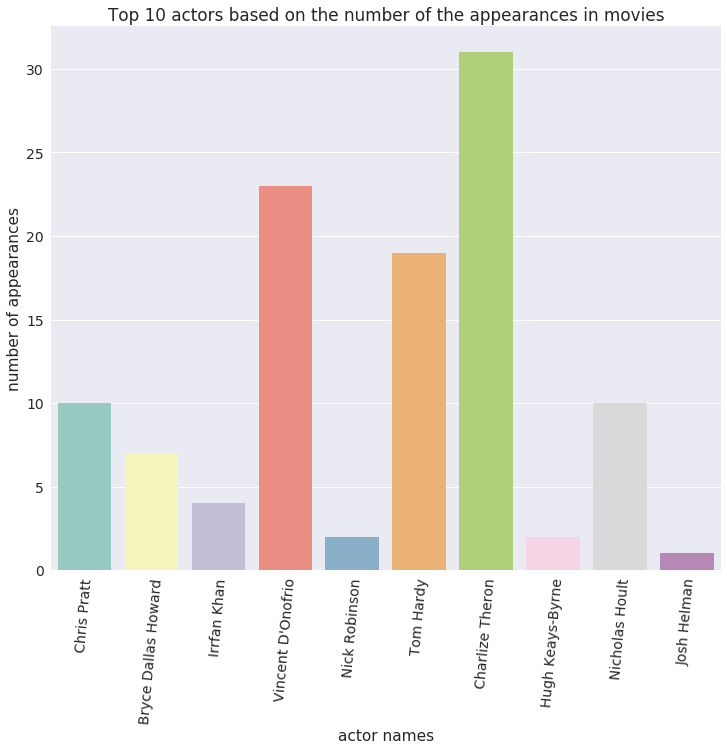

In [28]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

######
#Creating a dict for the cast, and how many times each actor casted for movies
######
actor_dict = {}

actors = tmdb["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = lambda elem:(1) , reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:10]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 10 actors based on the number of the appearances in movies')
plt.show()

It is clear from the figure above that the top 3 actors with the biggest number of appearances are Charlize Theron, Vincent D'Onofrio and Tom Hardy.

### Research Question 2  Most popular movie genre by year?

Lets explore the movies' genres, over the years of the TMDb dataset. This part contains multiple questions. At first lets ask a question which genre was the most popular from year to year over these years. Secondly another question is lets find out how many movies per genre were produced from year to year. Lastly it would be great to plot the number of the movie genres that were produced all over these years. The code snippets below investigates the dataset and produces the answers for the questions mentioned above. To code snippet below prepares a dataframe containing the number of movies from year to year.



In [29]:
year_set = set()
genre_set = set()
genres_and_year = tmdb[["genres", "release_year"]]

#########################
#create a set of unique years of movies
#########################
production_year = genres_and_year["release_year"]
production_year = production_year.drop_duplicates()
for year in production_year:
    if year not in year_set:
        year_set.add(year)
        
#print(year_set)


#############################################################
#create a set of unique genres by parsing all the years
#############################################################
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_set:
                genre_set.add(genre)


#print("year:", year, "\n", sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True))      


##########################################################################
#create a dataframe which contains the sum of movies' genre per year
##########################################################################
gerne_count_per_year_df = pd.DataFrame(index = year_set, columns=genre_set)
gerne_count_per_year_df[:] = 0  

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
                    
    aux_df = pd.DataFrame(genre_dict, index = [year])
    gerne_count_per_year_df.loc[year, aux_df.columns] = gerne_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]



########################################################
###most popular genre of movies from year to year
########################################################
#print(gerne_count_per_year_df.apply( max, axis=1 ))
#print(gerne_count_per_year_df.idxmax(axis = 1))
most_popular_genre_by_year = pd.DataFrame([gerne_count_per_year_df.idxmax(axis = 1).values,
                                          gerne_count_per_year_df.apply( max, axis=1 ).values],
                                          columns = gerne_count_per_year_df.index,
                                         index = ["genre", 'counts'])

After the execution of the code above, lets see which movie genre was the most popular from year to year and the number of movies that belong to this genre. The following table describes the idea described above. Each year in this table show the most popular movie genre and the number of movies in this category.

In [46]:
most_popular_genre_by_year

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,Drama,Drama,Drama,History,Drama,Drama,Adventure,Drama,Drama,Western,...,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
counts,3,6,5,3,4,3,2,7,6,2,...,89,75,81,83,85,89,66,80,79,81


How many movies based on their genres were produced?

Examining even more the movie genres' some can wonder about the number of movies based on their genre. Thus the next code snippet and the next figure show the number of movies that produced in 1960 to 2015 according to their respective movie genres.

Examining even more the movie genres, some can wonder about the number of movies based on their genre. Thus the next code snippet and the next figure show the number of movies that produced in 1960 to 2015 according to their respective movie genres.

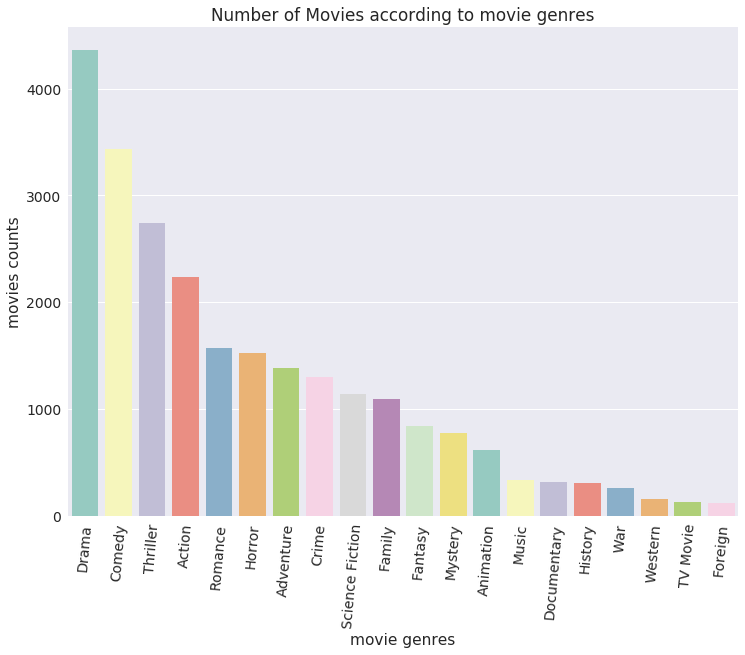

In [30]:
temp = gerne_count_per_year_df.apply(sum)
temp = temp.sort_values(ascending= False)

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)
ax = sns.barplot(temp.index, temp, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='movie genres', ylabel='movies counts', title = 'Number of Movies according to movie genres')
plt.show()

## Average Vote distribution
We an also look at the movies' average votes. Lets see their distribution. The following code creates a boxplot which illustrates their mean which is about 6.

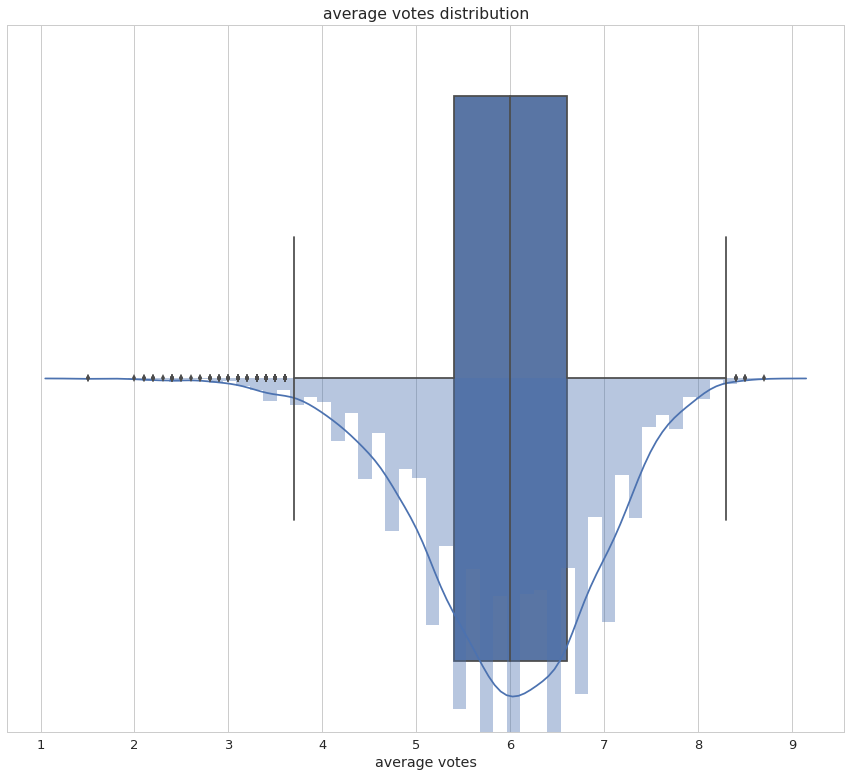

In [31]:
#movie ratings' distribution all over the years

sns.set(rc={'figure.figsize':(15,13)}, font_scale=1.3)

temp_df = tmdb[["vote_average"]]


sns.set_style("whitegrid")
ax = sns.distplot(temp_df.vote_average)

ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='average votes', title = 'average votes distribution')
plt.show()

<a id='conclusions'></a>
## Conclusions

This dataset is very rich in information.  There are many famous actors based on number of appearance like Charlize Theron who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years.


## Limitations

Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed. For example null values is an obstacle which stopped me when I was analyzing the top casted actors. Hence data cleaning is a necessary part before moving on to the dataset's investigation.


The following links are the resources I used as a reference to analyse The MDB dataset.

Working with Multi-Index Pandas DataFrames
Apply and Lambda usage in pandas
Pandas Melt, Stack and wide_to_long For Reshaping Columns into Rows
Pandas long to wide reshape, by two variables
Sorting Pandas Dataframe by order of another index
https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb/notebook
https://praxitelisk.github.io/DAND-P1-Investigate-a-Dataset/Investigate_a_Dataset.html

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255